In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# 刪除不必要的欄位
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# 重新命名欄位
df.columns = ['labels', 'data']

# 二元數位化標記(labels)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

# 分為訓練與測試組
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)


In [4]:
# 文字處理
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, 
                "N": wordnet.NOUN, 
                "V": wordnet.VERB,
                "R": wordnet. ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def preprocessing(X):
    # remove non-alphabet
    X = [re.sub('[^a-zA-Z]', ' ', str(x)).lower() for x in X]
    # tokenize
    X = [nltk.word_tokenize(x) for x in X]
    
    # remove stopwords and lemmatize
    X_stopwords_lemmatize = []
    stop_words = set(stopwords.words('english'))
        
    for x in X:
        content = []
        for word in x:
            if word not in stop_words:
                word = lemmatizer.lemmatize(word, get_pos(word))
                content.append(word)
        X_stopwords_lemmatize.append(content)
    
    X_output = [ ' '.join(x) for x in X_stopwords_lemmatize]
    return X_output


df_train = preprocessing(df_train.values)
df_test = preprocessing(df_test.values)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# 方法1:以TF-IDF 為特徵
# tfidf = TfidfVectorizer(decode_error='ignore')
# Xtrain = tfidf.fit_transform(df_train)
# Xtest = tfidf.transform(df_test)

# 方法2:以數量為特徵
count_vectorizer = CountVectorizer(decode_error='ignore')
Xtrain = count_vectorizer.fit_transform(df_train)
Xtest = count_vectorizer.transform(df_test)

In [6]:
# 產生模型，訓練，印出 (TFIDF)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.976158585587999
test score: 0.9635671560630777


In [9]:
# 產生模型，訓練，印出 (BOW)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score:", model.score(Xtrain, Ytrain))
print("test score:", model.score(Xtest, Ytest))
# exit()

train score: 0.9922314492365389
test score: 0.9836867862969005


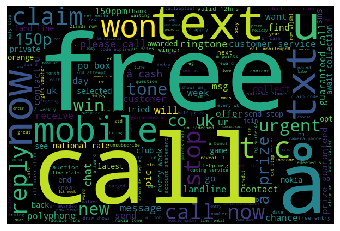

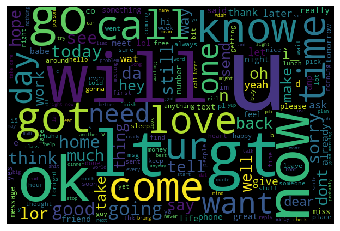

In [7]:
# 以wordcloud visualize 數據
def visualize(label):
  words = ''
  for msg in df[df['labels'] == label]['data']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

visualize('spam')
visualize('ham')